In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="6"

In [2]:
import cv2
from PIL import  Image
import numpy as np

In [3]:
image_directory = '/data1/hom1/ict06/Br35H Brain Tumor Detection 2020/dataset/'

dataset=[]
label=[]

no_tumor_images = os.listdir('/data1/hom1/ict06/Br35H Brain Tumor Detection 2020/dataset/no')
yes_tumor_images = os.listdir('/data1/hom1/ict06/Br35H Brain Tumor Detection 2020/dataset/yes')

In [4]:
for i , image_name in enumerate(no_tumor_images):
  if(image_name.split('.')[1]== 'jpg'):
      image=cv2.imread(image_directory+'no/'+image_name)
      image=Image.fromarray(image, 'RGB')
      image=image.resize((224,224))
      dataset.append(np.array(image))
      label.append(0)

In [5]:
for i , image_name in enumerate(yes_tumor_images):
  if(image_name.split('.')[1]== 'jpg'):
      image=cv2.imread(image_directory+'yes/'+image_name)
      image=Image.fromarray(image, 'RGB')
      image=image.resize((224,224))
      dataset.append(np.array(image))
      label.append(1)

In [6]:
print(len(dataset))
print(len(label))
dataset=np.array(dataset)
label=np.array(label)

3000
3000


In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(dataset, label, test_size=0.2, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2400, 224, 224, 3)
(600, 224, 224, 3)
(2400,)
(600,)


In [8]:
import tensorflow as tf
from tensorflow import keras
from keras.utils.np_utils import normalize

x_train= normalize(x_train, axis=1)
x_test = normalize(x_test, axis=1)

2022-01-11 08:55:03.423545: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [9]:
from tensorflow.keras.applications import InceptionResNetV2
inc=InceptionResNetV2(input_shape=(224,224,3), weights='imagenet', include_top=False)

2022-01-11 08:55:06.153869: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-01-11 08:55:06.238067: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:c1:00.0 name: RTX A5000 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 64 deviceMemorySize: 23.69GiB deviceMemoryBandwidth: 715.34GiB/s
2022-01-11 08:55:06.238098: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-01-11 08:55:06.240011: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-01-11 08:55:06.240049: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2022-01-11 08:55:06.241001: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcufft.so.10
2022

In [10]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense


for i in inc.layers:
  i.trainable=False

x=Flatten()(inc.output)
prediction=Dense(1, activation='sigmoid')(x)

In [11]:
from tensorflow.keras.models import Model
model=Model(inputs=inc.input, outputs=prediction)

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
hist=model.fit(x_train, y_train, batch_size=32, 
               verbose=1, epochs=50, 
               validation_data=(x_test,y_test), shuffle=False)

model.save('/data1/hom1/ict06/Models/IncRes(BT).h5')

2022-01-11 08:55:11.446900: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-01-11 08:55:11.464179: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2799860000 Hz


Epoch 1/50


2022-01-11 08:55:17.758121: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2022-01-11 08:55:18.465408: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8101
2022-01-11 08:55:19.373523: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-01-11 08:55:20.121979: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


75/75 [==============================] - 17s 110ms/step - loss: 0.4962 - accuracy: 0.8667 - val_loss: 0.1860 - val_accuracy: 0.9367
Epoch 2/50
75/75 [==============================] - 5s 73ms/step - loss: 0.0692 - accuracy: 0.9762 - val_loss: 0.1434 - val_accuracy: 0.9517
Epoch 3/50
75/75 [==============================] - 5s 72ms/step - loss: 0.0476 - accuracy: 0.9808 - val_loss: 0.1429 - val_accuracy: 0.9600
Epoch 4/50
75/75 [==============================] - 6s 77ms/step - loss: 0.1196 - accuracy: 0.9525 - val_loss: 0.2471 - val_accuracy: 0.9483
Epoch 5/50
75/75 [==============================] - 6s 74ms/step - loss: 0.1057 - accuracy: 0.9638 - val_loss: 0.1374 - val_accuracy: 0.9733
Epoch 6/50
75/75 [==============================] - 6s 78ms/step - loss: 0.0377 - accuracy: 0.9850 - val_loss: 0.1285 - val_accuracy: 0.9750
Epoch 7/50
75/75 [==============================] - 5s 73ms/step - loss: 0.0108 - accuracy: 0.9954 - val_loss: 0.1453 - val_accuracy: 0.9733
Epoch 8/50
75/75 [====

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
metrics = pd.DataFrame(model.history.history)

Text(0.5, 0, 'Epoch')

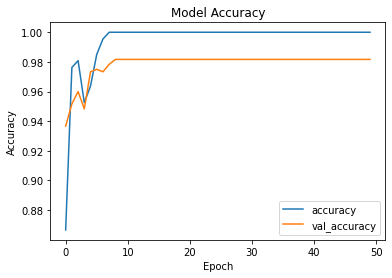

In [15]:
metrics[['accuracy', 'val_accuracy']].plot()
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")

Text(0.5, 0, 'Epoch')

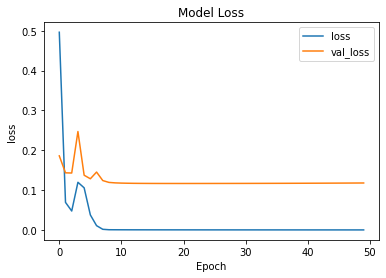

In [16]:
metrics[['loss', 'val_loss']].plot()
plt.title("Model Loss")
plt.ylabel("loss")
plt.xlabel("Epoch")

In [17]:
_, acc= model.evaluate(x_test,y_test)
print("Accuracy =", (acc * 100.0), "%")

19/19 [==============================] - 1s 60ms/step - loss: 0.1179 - accuracy: 0.9817
Accuracy = 98.16666841506958 %


In [18]:
y_pred = model.predict(x_test)

In [19]:
mythreshold= 0.5
from sklearn.metrics import confusion_matrix
y_pred= (model.predict(x_test)>= mythreshold).astype(int)
cm= confusion_matrix(y_test, y_pred)
print(cm)

[[337   6]
 [  5 252]]


Text(0.5, 15.0, 'Predicted Label')

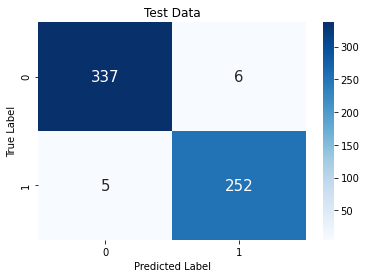

In [20]:
import seaborn as sns
sns.heatmap(cm, annot=True , cmap="Blues" , fmt="d", cbar=True, annot_kws={"size":15})
plt.title("Test Data")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

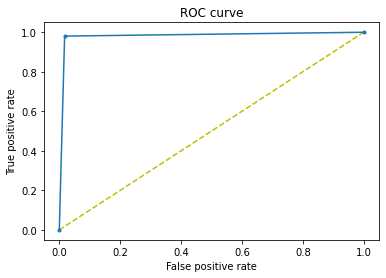

In [21]:
from sklearn.metrics import roc_curve
y_preds = model.predict(x_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [22]:
from sklearn.metrics import auc
auc_value = auc(fpr, tpr)
print("Area under curve, AUC = ", auc_value)

Area under curve, AUC =  0.9815260178557249


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       343
           1       0.98      0.98      0.98       257

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600

